In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

In [2]:
def plot_percent_correct(df):
    grouped_data = df.groupby("name")["correct"].mean()

    plt.figure(figsize=(5, 5))
    grouped_data.plot(kind='bar')

    plt.title('Percent Correct per Model')
    plt.xlabel('Model Name')
    plt.ylabel('Percent Correct')
    plt.xticks(rotation=10)
    plt.tight_layout()

    plt.show()

In [3]:
def plot_time(df):
    stats = df.groupby("name")["time"].agg(["min", "mean", "max"])

    lower_err = stats["mean"] - stats["min"]
    upper_err = stats["max"] - stats["mean"]
    asymmetric_error = [lower_err, upper_err]

    plt.figure(figsize=(5, 5))
    plt.bar(stats.index, stats["mean"], yerr=asymmetric_error, capsize=5)

    plt.title("Execution Time (Mean ± Range) per Model")
    plt.xlabel("Model Variant")
    plt.ylabel("Execution Time (s)")
    plt.xticks(rotation=10)
    plt.tight_layout()
    plt.show()

# Simple Addition

In [4]:
df = pd.read_csv("results/Simple Addition.csv")

In [5]:
answer = "add_two_numbers {'a': 5, 'b': 4} Function output: 9"
df["correct"] = df["tools"] == answer

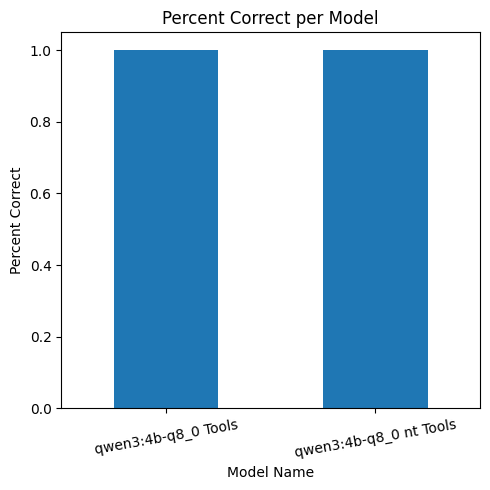

In [6]:
plot_percent_correct(df)

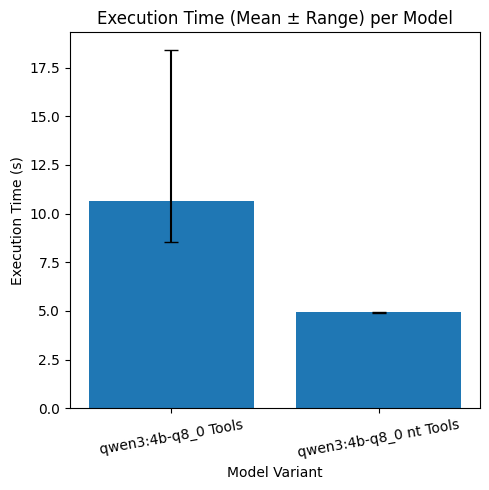

In [7]:
plot_time(df)

# Next Task

In [8]:
df = pd.read_csv("results/Next Task.csv")

In [9]:
answer = "peek_task {'n': 1} Function output: []"
df["correct"] = df["tools"] == answer

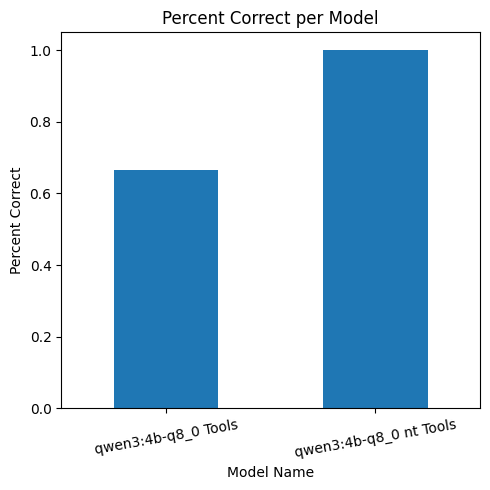

In [10]:
plot_percent_correct(df)

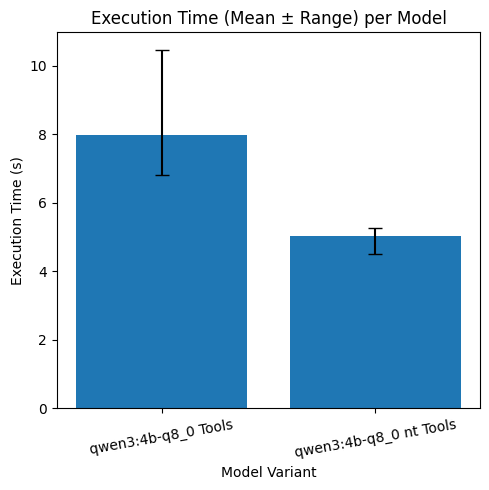

In [11]:
plot_time(df)

# LLM in Project

In [12]:
df = pd.read_csv("results/LLM in Project.csv")

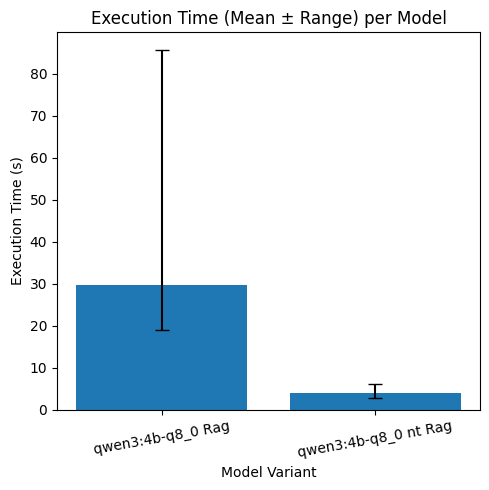

In [13]:
plot_time(df)

In [14]:
grouped = df.groupby('name')[['time', 'output']]

wrapper = textwrap.TextWrapper(width=100)

for name, outputs in grouped:
    print(f"Name: {name}")
    print()
    for i, (time, output) in enumerate(outputs.values):
        output = '\n'.join(wrapper.fill(line) for line in output.splitlines())
        print(f"  Output {i} with time {time}:\n{output}")
        print("-" * 100)
        print()
    print("-=" * 50)
    print()

Name: qwen3:4b-q8_0 Rag

  Output 0 with time 24.7877:
LLMs are used in this project for several key functions. First, a local LLM powers the EV's aural
aid system, using speech recognition and synthesis to enable voice interaction. This LLM is enhanced
with a Retrieval-Augmented Generation (RAG) pipeline to access mission data from documents and other
systems.

Additionally, an LLM decoder model performs predictive analysis on resource levels (like oxygen and
energy) using historical data. This helps forecast resource availability during EV operations.

The project also uses Qwen3 as the primary LLM for the AI assistant "Jarvis," which handles user
queries, provides instructions, and recommends function calls. The system integrates open-source
models for speech processing and leverages RAG to ensure accurate, mission-relevant responses.

Redundancy is ensured by combining LLM predictions with simple resource equations for resource
estimation.
------------------------------------------